In [2]:
# loading the data 
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i_94.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
i_94.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


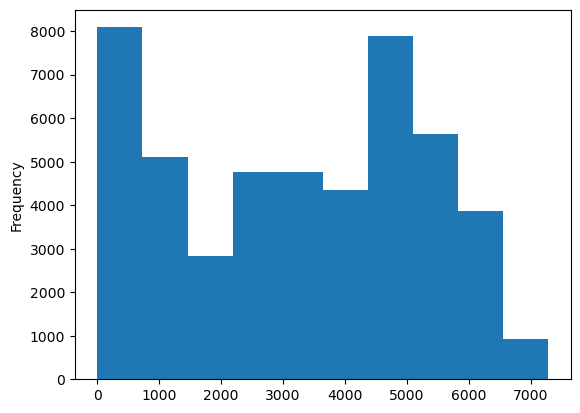

In [10]:
#visualizing the traffic load 

import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.show() 

(23877, 9)
(24327, 9)


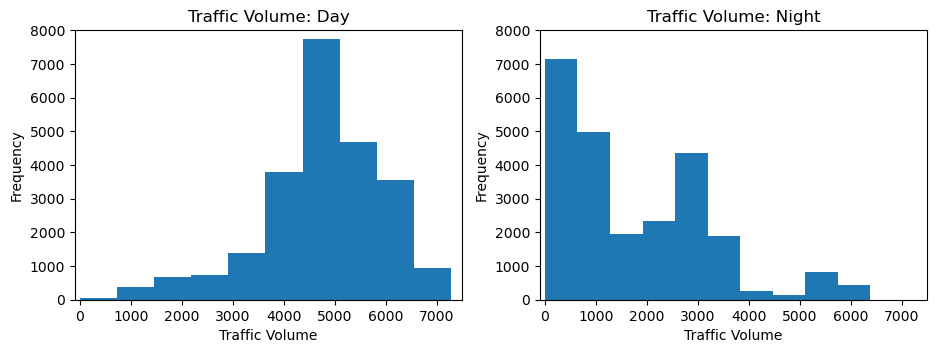

In [14]:
# visualizing traffic load per day / night 


i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)



plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [20]:
day['traffic_volume'].describe()
# the data is left skewed, most of the traffic is high. There are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [18]:
night['traffic_volume'].describe()

# the data is right skewed here, most of the traffic is low. 75% of the time, the number of cars that passed the station each hour was less than 2,819.

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

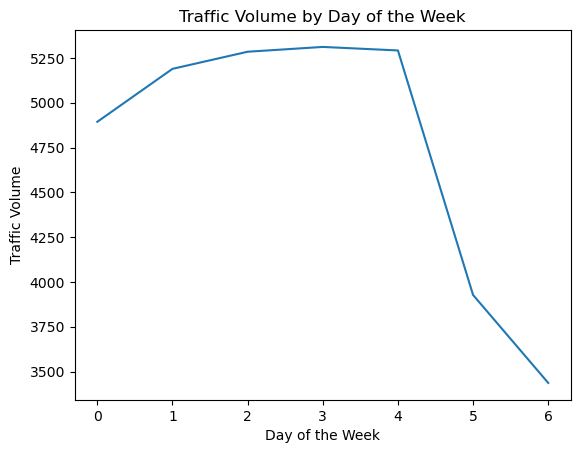

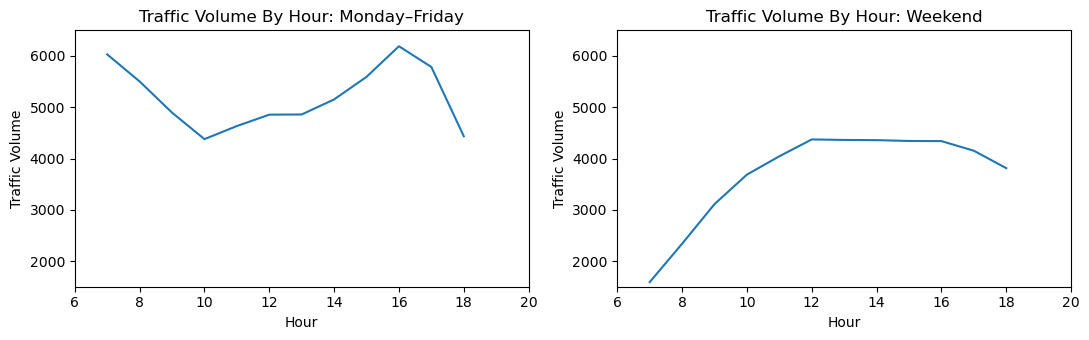

In [42]:
# let's focus on the day data and drill down further. How is traffic distributed based on a time of the day? 

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'day' is your DataFrame and 'date_time' is a datetime column
day['dayofweek'] = day['date_time'].dt.dayofweek

# Ensure 'traffic_volume' column is numeric
day['traffic_volume'] = pd.to_numeric(day['traffic_volume'], errors='coerce')

# Group by day of the week and calculate the mean
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)

# Plot traffic volume by day of the week
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.show()

# Extract the hour from the datetime column
day['hour'] = day['date_time'].dt.hour

# Separate business days and weekends
business_days = day[day['dayofweek'] <= 4].copy()  # 4 == Friday
weekend = day[day['dayofweek'] >= 5].copy()  # 5 == Saturday

# Select only numeric columns before grouping by hour and calculating the mean
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

# Plot traffic volume by hour for business days and weekends
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Monday–Friday')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Weekend')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.tight_layout()
plt.show()


In [ ]:
# Traffic is high during the weekdays and slows down substantially over the weekend. 
# During the weekdays, traffic peaks during 7am and 4pm. 
# During the weekend, there is an increase in traffic around 10am-12pm. 

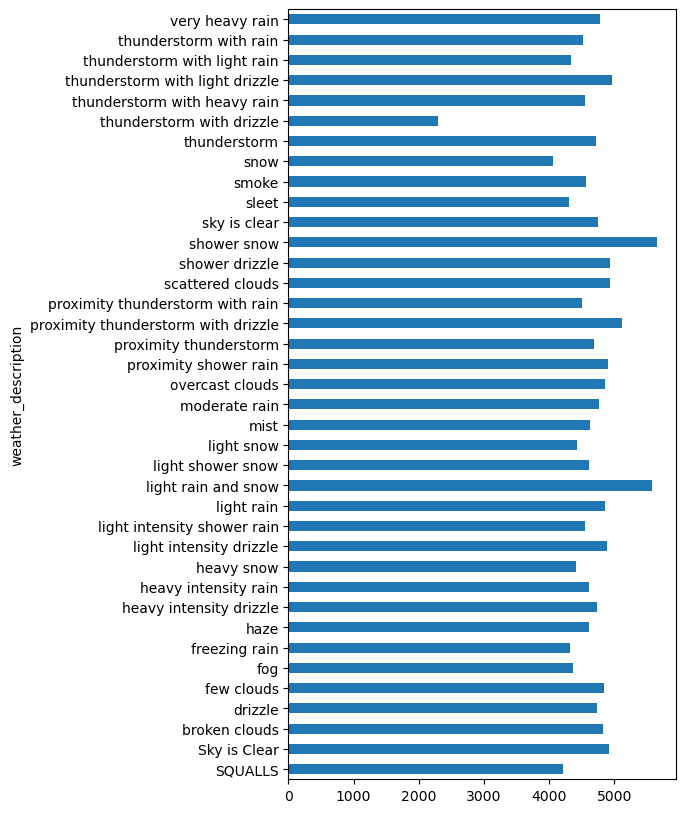

In [48]:
# Does the weather play into the traffic volumes?

by_weather_description = day.groupby('weather_description').mean(numeric_only=True)
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show

# Looking at the graph, during thunderstorm with drizzle weather the traffic slows down substantially (could be missing data). 
# Another tendency we're noticing are increased amounts of traffic (over 5000) during shower snow, light rain and snow and prozimity thunderstorm with drizzle types of weather. 